This notebook provides a quick exploration of regression using raster temperature and meteorological station.
Check:
https://stackoverflow.com/questions/45175201/how-can-i-interpolate-station-data-with-kriging-in-python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio
import subprocess
import pandas as pd
import os, glob
from rasterio import plot
import geopandas as gpd
import georasters as gr


in_dir="/nfs/bparmentier-data/Data/workshop_spatial/climate_regression/data/Oregon_covariates"
out_dir="/nfs/bparmentier-data/Data/workshop_spatial/climate_regression/outputs"

#epsg 2991
crs_reg = "+proj=lcc +lat_1=43 +lat_2=45.5 +lat_0=41.75 +lon_0=-120.5 +x_0=400000 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs"

infile = "mean_month1_rescaled.rst"
infile_forest_perc =""
#infile = "mean_month1_rescaled.tif"
#infile = "lst_mean_month1_rescaled.tif"

ghcn_filename = "ghcn_or_tmax_covariates_06262012_OR83M.shp"


data_gpd = gpd.read_file(os.path.join(in_dir,ghcn_filename))

data_gpd 

# -12 layers from land cover concensus (Jetz lab)
fileglob = "*.rst"
pathglob = os.path.join(in_dir, fileglob)
l_f = glob.glob(pathglob)
l_f.sort() #order input by decade
l_dir = map(lambda x: os.path.splitext(x)[0],l_f) #remmove extension
l_dir = map(lambda x: os.path.join(out_dir,os.path.basename(x)),l_dir) #set the directory output
 

# Read raster bands directly to Numpy arrays.
with rasterio.open(os.path.join(in_dir,infile)) as src:
        r_lst = src.read(1,masked=True) #read first array with masked value, nan are assigned for NA
        spatial_extent = rasterio.plot.plotting_extent(src)

    # Combine arrays using the 'iadd' ufunc. Expecting that the sum will
    # exceed the 8-bit integer range, initialize it as 16-bit. Adding other
    # arrays to it in-place converts those arrays up and preserves the type
    # of the total array.
    #total = np.zeros(r.shape, dtype=rasterio.uint16)
    #for band in (r, g, b):
    #    total += band
    #total = total // 3

plot.show(r_lst)
#plot.show(r_lst,cmap='viridis',scheme='quantiles')

src.crs # not defined with *.rst

/usr/local/lib/python3.5/dist-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


<Figure size 640x480 with 1 Axes>

CRS({})

In [2]:
r_lst.size
#r_lst.ndim #array dimension
src.height
#src.profile
type(r_lst)

numpy.ma.core.MaskedArray

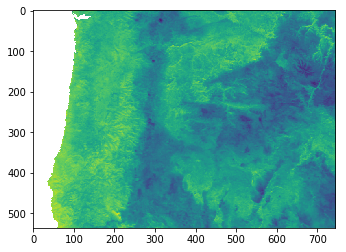

In [3]:
#plt.figure(figsize=(6,8.5))
#plt.imshow(subset)
plt.imshow(r_lst)
#plt.hist(r_lst)


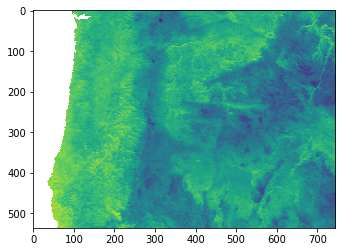

In [4]:
#see: https://matplotlib.org/users/image_tutorial.html
plt.imshow(r_lst, clim=(259.0, 287.0))

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 9.000e+00, 4.000e+00, 6.000e+00,
        7.000e+00, 8.000e+00, 6.000e+00, 1.000e+01, 1.100e+01, 1.400e+01,
        6.000e+00, 2.400e+01, 1.800e+01, 2.700e+01, 3.300e+01, 3.600e+01,
        4.100e+01, 5.000e+01, 7.700e+01, 6.800e+01, 7.300e+01, 8.400e+01,
        1.190e+02, 1.110e+02, 1.400e+02, 1.350e+02, 1.820e+02, 1.730e+02,
        2.020e+02, 2.230e+02, 2.380e+02, 2.890e+02, 3.170e+02, 3.280e+02,
        3.920e+02, 4.380e+02, 4.780e+02, 5.140e+02, 4.960e+02, 5.900e+02,
        7.000e+02, 7.140e+02, 7.150e+02, 8.290e+02, 9.490e+02, 9.770e+02,
        1.029e+03, 1.066e+03, 1.125e+0

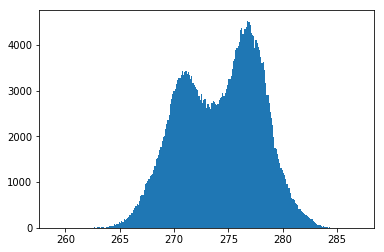

In [5]:
plt.hist(r_lst.ravel(),bins=256,range=(259.0,287.0))

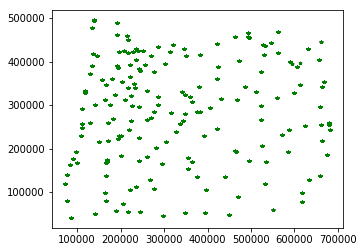

In [6]:
data_gpd.plot(marker="*",color="green",markersize=5)
station_or = data_gpd.to_crs({'init': 'epsg:2991'})

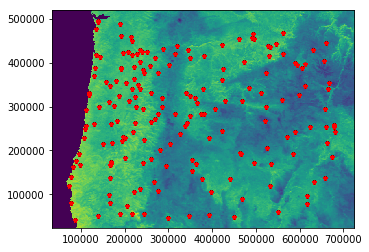

In [7]:
#https://www.earthdatascience.org/courses/earth-analytics-python/lidar-raster-data/customize-matplotlib-raster-maps/

fig, ax = plt.subplots()
with rasterio.open(os.path.join(in_dir,infile)) as src:
        rasterio.plot.show((src,1),ax=ax,
                          clim=(259.0,287.0),)

#plot.show(r_lst, clim=(259.0, 287.0),ax=ax)
#with rasterio.plot.show((src,1),ax=ax)
station_or.plot(ax=ax,marker="*",
              color="red",
               markersize=10)

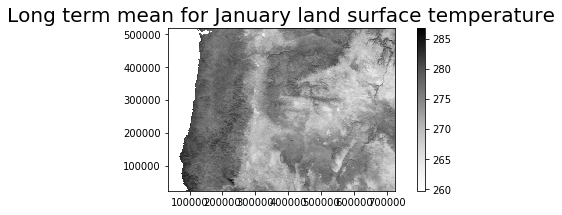

In [8]:
fig, ax = plt.subplots(figsize = (8,3))
lst_plot = ax.imshow(r_lst, 
                       cmap='Greys', 
                       extent=spatial_extent)
ax.set_title("Long term mean for January land surface temperature", fontsize= 20)
fig.colorbar(lst_plot)
# turn off the x and y axes for prettier plotting
#ax.set_axis_off(); #this removes coordinates on the plot

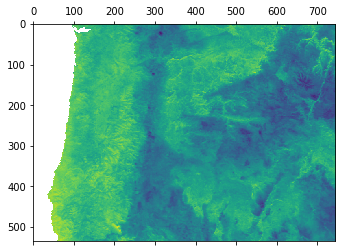

In [12]:
#raster = './data/slope.tif'
data=gr.from_file(os.path.join(in_dir,infile))
#data = gr.from_file(raster)

# Plot data
data.plot()

In [ ]:
x_coord = station_or.geometry.x # pands.core.series.Series
y_coord = station_or.geometry.y


# Get some stats
#data.mean()
#data.sum()
#data.std()

# Convert to Pandas DataFrame
#df = data.to_pandas()

# Save transformed data to GeoTiff
#data2 = data**2
#data2.to_tiff('./data2')

# Algebra with rasters
#data3 = np.sin(data.raster) / data2
#data3.plot()

# Notice that by using the data.raster object,
# you can do any mathematical operation that handles
# Numpy Masked Arrays

# Find value at point (x,y) or at vectors (X,Y)
#value = data.map_pixel(x,y)
Value = data.map_pixel(x_coord,y_coord)